In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyneb as pn
import numpy as np

In [2]:
O3_EG = pn.EmisGrid('O', 3, n_tem=30, n_den=30)

In [3]:
O3_EG = pn.EmisGrid(elem='O', spec=3, n_tem=100, n_den=100, 
                    tem_min=5000., tem_max=20000., den_min=10., 
                    den_max=1.e8, restore_file=None, atomObj=None)

In [4]:
O3_5007 = O3_EG.getGrid(wave=5007)

In [5]:
O3_5007.shape

(100, 100)

In [6]:
O3_Te = O3_EG.getGrid(to_eval = 'L(4363)/L(5007)')

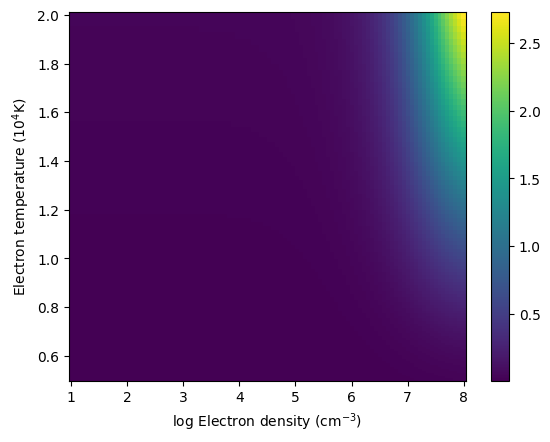

In [7]:
O3_EG.plotImage(to_eval = 'L(4363)/L(5007)')

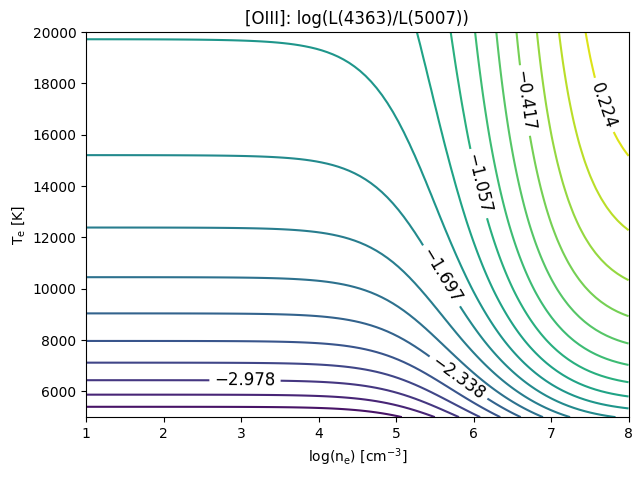

In [8]:
f, ax = plt.subplots(figsize=(7,5))
O3_EG.plotContours(to_eval = 'L(4363)/L(5007)', ax=ax)
f.savefig('OIII_diag.pdf')

In [9]:
emisgrids = pn.getEmisGridDict(atom_list=['O2', 'O3', 'N2'])

warng getEmisGridDict: Emission map not found: ./pypics//emis_O2.pypic
warng getEmisGridDict: Emission map not found: ./pypics//emis_O3.pypic
warng getEmisGridDict: Emission map not found: ./pypics//emis_N2.pypic


In [10]:
emisgrids

{'O2': <pyneb.core.emisGrid.EmisGrid at 0x70a53a24c5f0>,
 'O3': <pyneb.core.emisGrid.EmisGrid at 0x70a539d89fd0>,
 'N2': <pyneb.core.emisGrid.EmisGrid at 0x70a539d04b00>}

In [11]:
diags = pn.Diagnostics() # See next section
emisgrids = pn.getEmisGridDict(atomDict=diags.atomDict, den_max=1e6)

In [12]:
diags = pn.Diagnostics()

In [13]:
diags.addDiag(['[NI] 5198/5200','[NII] 5755/6548','[OII] 3726/3729'])

In [14]:
diags.addDiag('[OIII] 4363/4959', ('O3', 'L(4363)/L(4959)', 'RMS([E(4363),E(4959)])'))

In [15]:
diags.getCrossTemDen('[NII] 5755/6548', '[SII] 6731/6716', 0.02, 1.0)

(np.float64(7602.6382828191445), np.float64(637.1108702214491))

In [16]:
for diag in sorted(pn.diags_dict.keys()):
    print('"{0}" : {1}'.format(diag, pn.diags_dict[diag]))

"OII 4649.13/4089.29" : ('O2r', "S('4649.13')/S('4089.29')", "RMS([SE('4649.13'), SE('4089.29')])")
"OII 4649.13/4661.63" : ('O2r', "S('4649.13')/S('4661.63')", "RMS([SE('4649.13'), SE('4661.63')])")
"[ArIII] (7751+7136)/9m" : ('Ar3', '(L(7751)+L(7136))/L(90000)', 'RMS([E(90000), E(7751)*L(7751)/(L(7751)+L(7136)), E(7136)*L(7136)/(L(7751)+L(7136))])')
"[ArIII] 5192/7136" : ('Ar3', 'L(5192)/L(7136)', 'RMS([E(7136), E(5192)])')
"[ArIII] 5192/7300+" : ('Ar3', 'L(5192)/(L(7751)+L(7136))', 'RMS([E(7751)*L(7751)/(L(7751)+L(7136)), E(7136)*L(7136)/(L(7751)+L(7136)), E(5192)])')
"[ArIII] 7136/9m" : ('Ar3', 'L(7136)/L(90000)', 'RMS([E(90000), E(7136)])')
"[ArIII] 9.0m/21.8m" : ('Ar3', 'L(89897)/L(218000)', 'RMS([E(89897), E(218000)])')
"[ArIV] 2860+/4720+" : ('Ar4', '(L(2854)+L(2868))/(L(4711)+L(4740))', 'RMS([E(4711)*L(4711)/(L(4711)+L(4740)), E(4740)*L(4740)/(L(4711)+L(4740)), E(2854)*L(2854)/(L(2854)+L(2868)), E(2868)*L(2854)/(L(2854)+L(2868))])')
"[ArIV] 4740/4711" : ('Ar4', 'L(4740)/L(4711

In [17]:
obs = pn.Observation()
obs.readData('observations1.dat', fileFormat='lines_in_rows', err_default=0.05) # fill obs with data read from observations1.dat
obs.def_EBV(label1="H1r_6563A", label2="H1r_4861A", r_theo=2.85)
obs.correctData(normWave=4861.)

In [18]:
diags = pn.Diagnostics()
diags.addDiagsFromObs(obs)
diags.diags

{'[NII] 5755/6548': ('N2', 'L(5755)/L(6548)', 'RMS([E(6548), E(5755)])'),
 '[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[NII] 5755/6584+': ('N2',
  'L(5755)/(L(6548)+L(6584))',
  'RMS([E(6548)*L(6548)/(L(6548)+L(6584)), E(6584)*L(6584)/(L(6584)+L(6548)), E(5755)])'),
 '[OII] 3726/3729': ('O2', 'L(3726)/L(3729)', 'RMS([E(3729), E(3726)])'),
 '[OII] 3727+/7325+': ('O2',
  '(L(3726)+L(3729))/(B("7319A+")+B("7330A+"))',
  'RMS([E(3726)*L(3726)/(L(3726)+L(3729)), E(3729)*L(3729)/(L(3726)+L(3729)),BE("7319A+")*B("7319A+")/(B("7319A+")+B("7330A+")),BE("7330A+")*B("7330A+")/(B("7319A+")+B("7330A+"))])'),
 '[OIII] 4363/5007': ('O3', 'L(4363)/L(5007)', 'RMS([E(5007), E(4363)])'),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SII] 4069/4076': ('S2', 'L(4069)/L(4076)', 'RMS([E(4069), E(4076)])'),
 '[SII] 4072+/6720+': ('S2',
  '(L(4069)+L(4076))/(L(6716)+L(6731))',
  'RMS([E(6716)*L(6716)/(L(6716)+L(6731)), E(6731)*L(6731)/(L(6716)+L(673

In [19]:
diags.eval_diag('[OII] 3727+/7325+')

TypeError: Diagnostics.eval_diag() missing 1 required positional argument: 'obs'

In [20]:
obs.getIntens()

{'S4_10.5m': array([4.07647872]),
 'Ne2_12.8m': array([4.82602971]),
 'Ne3_15.6m': array([19.80270223]),
 'S3_18.7m': array([5.80184591]),
 'O2_3726A': array([46.57643989]),
 'O2_3729A': array([21.812058]),
 'Ne3_3869A': array([21.72186216]),
 'Ne3_3968A': array([7.25498471]),
 'S2_4069A': array([0.95040452]),
 'S2_4076A': array([0.50268123]),
 'O3_4363A': array([4.68705107]),
 'H1r_4861A': array([100.]),
 'O3_5007A': array([425.5991546]),
 'N2_5755A': array([0.45384655]),
 'S3_6312A': array([0.64146101]),
 'O1_6300A': array([1.42792388]),
 'O1_6364A': array([0.45369748]),
 'N2_6548A': array([5.65746807]),
 'H1r_6563A': array([285.]),
 'N2_6584A': array([15.66847485]),
 'S2_6716A': array([0.99540541]),
 'S2_6731A': array([1.77656379]),
 'Ar3_7136A': array([3.88214979]),
 'O2_7319A+': array([5.10642446]),
 'O2_7330A+': array([4.03377032])}

warng getEmisGridDict: Emission map not found: ./pypics//emis_S2.pypic
warng getEmisGridDict: Emission map not found: ./pypics//emis_S3.pypic
warng getEmisGridDict: Emission map not found: ./pypics//emis_Ne3.pypic


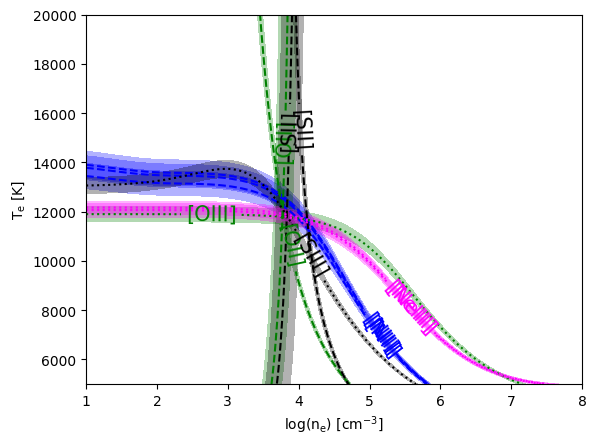

In [21]:
import matplotlib as mpl
%config InlineBackend.figure_format = 'png'
mpl.rc("savefig", dpi=150)
emisgrids = pn.getEmisGridDict(atomDict=diags.atomDict)
diags.plot(emisgrids, obs)

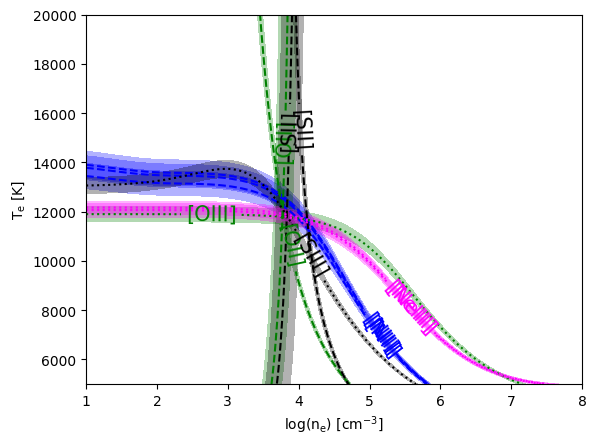

In [22]:
diags.plot(emisgrids, obs, i_obs = 0)

In [23]:
diags.diags

{'[NII] 5755/6548': ('N2', 'L(5755)/L(6548)', 'RMS([E(6548), E(5755)])'),
 '[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[NII] 5755/6584+': ('N2',
  'L(5755)/(L(6548)+L(6584))',
  'RMS([E(6548)*L(6548)/(L(6548)+L(6584)), E(6584)*L(6584)/(L(6584)+L(6548)), E(5755)])'),
 '[OII] 3726/3729': ('O2', 'L(3726)/L(3729)', 'RMS([E(3729), E(3726)])'),
 '[OII] 3727+/7325+': ('O2',
  '(L(3726)+L(3729))/(B("7319A+")+B("7330A+"))',
  'RMS([E(3726)*L(3726)/(L(3726)+L(3729)), E(3729)*L(3729)/(L(3726)+L(3729)),BE("7319A+")*B("7319A+")/(B("7319A+")+B("7330A+")),BE("7330A+")*B("7330A+")/(B("7319A+")+B("7330A+"))])'),
 '[OIII] 4363/5007': ('O3', 'L(4363)/L(5007)', 'RMS([E(5007), E(4363)])'),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SII] 4069/4076': ('S2', 'L(4069)/L(4076)', 'RMS([E(4069), E(4076)])'),
 '[SII] 4072+/6720+': ('S2',
  '(L(4069)+L(4076))/(L(6716)+L(6731))',
  'RMS([E(6716)*L(6716)/(L(6716)+L(6731)), E(6731)*L(6731)/(L(6716)+L(673

In [24]:
diags.addClabel('[OIII] 4363/5007', '[OIII]na')

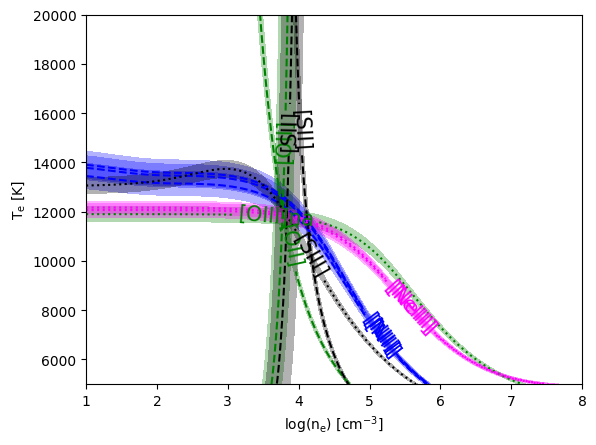

In [25]:
diags.plot(emisgrids, obs, i_obs = 0)

In [26]:
O3 = pn.Atom('O',3)
Opp_abund = O3.getIonAbundance(int_ratio=3239.4, tem=1.5e4, den=110., to_eval='L(5007)+L(4959)', Hbeta=100.0)
print('O++/O = {:5.2e}'.format(Opp_abund))

O++/O = 2.59e-04


In [27]:
obs = pn.Observation()
obs.readData('observations1.dat', fileFormat='lines_in_rows', err_default=0.05) # fill obs with data read from observations1.dat
obs.def_EBV(label1="H1r_6563A", label2="H1r_4861A", r_theo=2.85)
obs.correctData(normWave=4861.)

In [28]:
obs.printIntens()

S4_10.5m      4.076
Ne2_12.8m     4.826
Ne3_15.6m    19.803
S3_18.7m      5.802
O2_3726A     46.576
O2_3729A     21.812
Ne3_3869A    21.722
Ne3_3968A     7.255
S2_4069A      0.950
S2_4076A      0.503
O3_4363A      4.687
H1r_4861A   100.000
O3_5007A    425.599
N2_5755A      0.454
S3_6312A      0.641
O1_6300A      1.428
O1_6364A      0.454
N2_6548A      5.657
H1r_6563A   285.000
N2_6584A     15.668
S2_6716A      0.995
S2_6731A      1.777
Ar3_7136A     3.882
O2_7319A+     5.106
O2_7330A+     4.034


In [34]:
all_atoms = pn.getAtomDict(atom_list=obs.getUniqueAtoms())
line_ab = {}
ion_ab = {}
temp = 12000.
dens = 1e4
for line in obs.getSortedLines():
    if line.atom != 'H1' and line.atom != 'He1' and line.atom != 'He2':
        line_ab[line.label] = all_atoms[line.atom].getIonAbundance(line.corrIntens, temp, dens, 
                                                          to_eval=line.to_eval)
        if line.atom not in ion_ab:
            ion_ab[line.atom] = []
        ion_ab[line.atom].append(line_ab[line.label][0])
for line in sorted(line_ab):
    print('{:10} {:.2f}'.format(line, 12+np.log10(line_ab[line][0])))

warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng _ManageAtomicData: rec data not available for Ne3
warng _ManageAtomicData: rec data not available for S2
warng _ManageAtomicData: rec data not available for S3
warng _ManageAtomicData: rec data not available for S4
Ar3_7136A  5.33
H1r_4861A  12.00
H1r_6563A  12.01
N2_5755A   6.36
N2_6548A   6.38
N2_6584A   6.35
Ne2_12.8m  6.77
Ne3_15.6m  7.11
Ne3_3869A  7.07
Ne3_3968A  7.12
O1_6300A   6.16
O1_6364A   6.16
O2_3726A   7.46
O2_3729A   7.51
O2_7319A+  7.30
O2_7330A+  7.29
O3_4363A   7.89
O3_5007A   7.92
S2_4069A   5.09
S2_4076A   5.29
S2_6716A   5.07
S2_6731A   5.04
S3_18.7m   5.93
S3_6312A   5.82
S4_10.5m   5.17


In [35]:
for ion in sorted(ion_ab):
    print(ion, ion_ab[ion])

Ar3 [np.float64(2.137820055404805e-07)]
H1r [np.float64(1.0), np.float64(1.012426284751474)]
N2 [np.float64(2.2736199273983762e-06), np.float64(2.3964003294880454e-06), np.float64(2.2557784739201715e-06)]
Ne2 [np.float64(5.863763803374603e-06)]
Ne3 [np.float64(1.2834108902936717e-05), np.float64(1.1789947985274414e-05), np.float64(1.3072908397247664e-05)]
O1 [np.float64(1.4485642305673935e-06), np.float64(1.4410898953658047e-06)]
O2 [np.float64(2.8891949790314125e-05), np.float64(3.2113817671610226e-05), np.float64(1.9822856634114258e-05), np.float64(1.9460326955974556e-05)]
O3 [np.float64(7.769365391889838e-05), np.float64(8.284772814263309e-05)]
S2 [np.float64(1.2168904184366884e-07), np.float64(1.9515755040073016e-07), np.float64(1.1842098569016862e-07), np.float64(1.1079237893641951e-07)]
S3 [np.float64(8.538520510209693e-07), np.float64(6.608571320910761e-07)]
S4 [np.float64(1.4662176292645887e-07)]


In [36]:
for atom in ion_ab:
    mean = np.mean(np.asarray(ion_ab[atom]))
    ion_ab[atom] = mean
    print('{:4s}: {:4.2f}'.format(atom, 12+np.log10(mean)))

Ar3 : 5.33
H1r : 12.00
N2  : 6.36
Ne2 : 6.77
Ne3 : 7.10
O1  : 6.16
O2  : 7.40
O3  : 7.90
S2  : 5.14
S3  : 5.88
S4  : 5.17
